<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 27 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   idhous    1776 non-null   float64
 1   sex       2000 non-null   object 
 2   birthyr   2000 non-null   int64  
 3   nat_1_02  1775 non-null   object 
 4   plingu02  1647 non-null   object 
 5   p02r01    1566 non-null   object 
 6   p02r04    1566 non-null   object 
 7   cspfaj    1584 non-null   object 
 8   cspmoj    552 non-null    object 
 9   a15       2000 non-null   int64  
 10  a16       2000 non-null   int64  
 11  a17       2000 non-null   int64  
 12  a18       2000 non-null   int64  
 13  a19       2000 non-null   int64  
 14  a20       2000 non-null   int64  
 15  a21       2000 non-null   int64  
 16  a22       2000 non-null   int64  
 17  a23       2000 non-null   int64  
 18  a24       2000 non-null   int64  
 19  a25       2000 non-null   int64  
 20  a26       2000 non-null   int6

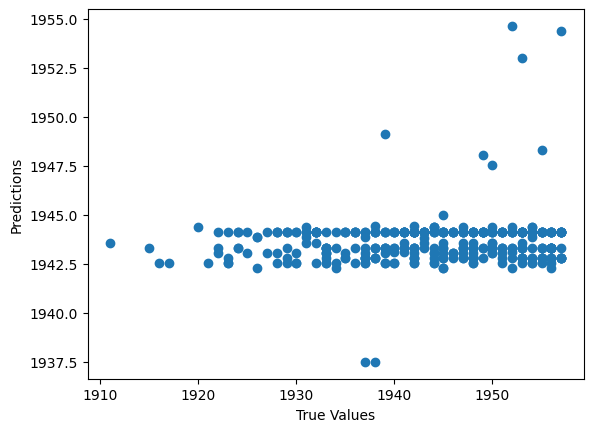

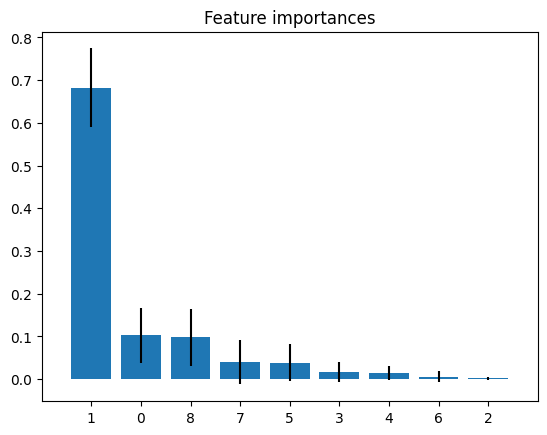

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve 
from sklearn.metrics import make_scorer 
from sklearn import linear_model, ensemble


# Загрузка данных
training_data = pd.read_csv("biofam.csv", delimiter = ';')

# Проверка размерности и типов данных
training_data.shape
training_data.info()

# Удаление пустых значений
training_data = training_data.dropna()

# Преобразование категориальных признаков в бинарные
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore')
training_points_encoded = encoder.fit_transform(training_data[['nat_1_02']])

# Объединение закодированных признаков с числовыми
training_points = np.hstack((training_data[['a16', 'a29']].values, training_points_encoded.toarray()))

# Определение целевой переменной
training_values = training_data['birthyr'].values

# Создание моделей линейной регрессии и случайного леса
linear_regression_model = linear_model.LinearRegression()
random_forest_model = ensemble.RandomForestRegressor(n_estimators=100)

# Обучение моделей на тренировочных данных
linear_regression_model.fit(training_points, training_values)
random_forest_model.fit(training_points, training_values)

# Оценка качества моделей на кросс-валидации
from sklearn.model_selection import cross_val_score
linear_regression_scores = cross_val_score(linear_regression_model, training_points, training_values, cv=10, scoring='r2')
random_forest_scores = cross_val_score(random_forest_model, training_points, training_values, cv=10, scoring='r2')
print('Linear Regression CV scores:', linear_regression_scores)
print('Random Forest CV scores:', random_forest_scores)
print('Average Linear Regression CV score:', np.mean(linear_regression_scores))
print('Average Random Forest CV score:', np.mean(random_forest_scores))

# Построение графика предсказаний линейной регрессии и истинных значений
predicted_values = linear_regression_model.predict(training_points)
plt.scatter(training_values, predicted_values)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

# Построение графика важности признаков в модели случайного леса
importances = random_forest_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in random_forest_model.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Feature importances")
plt.bar(range(training_points.shape[1]), importances[indices], yerr=std[indices])
plt.xticks(range(training_points.shape[1]), indices)
plt.xlim([-1, training_points.shape[1]])
plt.show()

